# import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import pickle

# read data

In [2]:
#data_train=pd.read_csv("D:/studies/depi/ottawa/second_term/ai_for_cs/project/dataset/training.csv")
data_train=pd.read_csv("D:/project_cs/training.csv")
data_validate=pd.read_csv("D:/project_cs/validation.csv")
#data_validate=pd.read_csv("D:/studies/depi/ottawa/second_term/ai_for_cs/project/dataset/validation.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_16948\492583339.py:2: DtypeWarning: Columns (84) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train=pd.read_csv("D:/project_cs/training.csv")


In [3]:
#showing training data
data_train

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.1-746-24675-17,172.16.0.5,746,192.168.50.1,24675,17,2018-12-01 11:07:56.502353,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,172.16.0.5-192.168.50.1-851-5766-17,172.16.0.5,851,192.168.50.1,5766,17,2018-12-01 11:06:32.000712,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
2,172.16.0.5-192.168.50.1-935-24548-17,172.16.0.5,935,192.168.50.1,24548,17,2018-12-01 11:08:48.524934,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,172.16.0.5-192.168.50.1-719-12510-17,172.16.0.5,719,192.168.50.1,12510,17,2018-12-01 11:13:23.585969,48,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,172.16.0.5-192.168.50.1-984-61717-17,172.16.0.5,984,192.168.50.1,61717,17,2018-12-01 11:12:57.299430,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001995,172.16.0.5-192.168.50.1-564-874-17,172.16.0.5,564,192.168.50.1,874,17,2018-12-01 11:12:51.786340,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4001996,172.16.0.5-192.168.50.1-564-42551-17,172.16.0.5,564,192.168.50.1,42551,17,2018-12-01 11:12:08.057584,47,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4001997,172.16.0.5-192.168.50.1-732-46750-17,172.16.0.5,732,192.168.50.1,46750,17,2018-12-01 11:09:29.349479,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4001998,172.16.0.5-192.168.50.1-582-37652-17,172.16.0.5,582,192.168.50.1,37652,17,2018-12-01 11:11:35.320319,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [4]:
#show validation data
data_validate

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.1-673-62967-17,172.16.0.5,673,192.168.50.1,62967,17,2018-12-01 11:15:59.921207,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,172.16.0.5-192.168.50.1-564-39431-17,172.16.0.5,564,192.168.50.1,39431,17,2018-12-01 11:16:03.133272,49,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
2,172.16.0.5-192.168.50.1-642-56652-17,172.16.0.5,642,192.168.50.1,56652,17,2018-12-01 11:16:03.356155,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,172.16.0.5-192.168.50.1-980-6257-17,172.16.0.5,980,192.168.50.1,6257,17,2018-12-01 11:15:58.247609,3,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,172.16.0.5-192.168.50.1-914-6074-17,172.16.0.5,914,192.168.50.1,6074,17,2018-12-01 11:16:01.963154,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71408,172.16.0.5-192.168.50.1-935-31850-17,172.16.0.5,935,192.168.50.1,31850,17,2018-12-01 11:15:57.716013,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
71409,172.16.0.5-192.168.50.1-644-9831-17,172.16.0.5,644,192.168.50.1,9831,17,2018-12-01 11:16:00.273808,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
71410,172.16.0.5-192.168.50.1-821-41094-17,172.16.0.5,821,192.168.50.1,41094,17,2018-12-01 11:15:58.154935,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
71411,172.16.0.5-192.168.50.1-663-54557-17,172.16.0.5,663,192.168.50.1,54557,17,2018-12-01 11:15:57.107167,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [5]:
#getting some info about training data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002000 entries, 0 to 4001999
Data columns (total 87 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow ID                      object 
 1   Source IP                    object 
 2   Source Port                  int64  
 3   Destination IP               object 
 4   Destination Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow Duration                int64  
 8   Total Fwd Packets            int64  
 9   Total Backward Packets       int64  
 10  Total Length of Fwd Packets  float64
 11  Total Length of Bwd Packets  float64
 12  Fwd Packet Length Max        float64
 13  Fwd Packet Length Min        float64
 14  Fwd Packet Length Mean       float64
 15  Fwd Packet Length Std        float64
 16  Bwd Packet Length Max        float64
 17  Bwd Packet Length Min        float64
 18  Bwd Packet Length Mean       float64
 19  

In [6]:
#getting some info about validation data
data_validate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71413 entries, 0 to 71412
Data columns (total 87 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow ID                      71413 non-null  object 
 1   Source IP                    71413 non-null  object 
 2   Source Port                  71413 non-null  int64  
 3   Destination IP               71413 non-null  object 
 4   Destination Port             71413 non-null  int64  
 5   Protocol                     71413 non-null  int64  
 6   Timestamp                    71413 non-null  object 
 7   Flow Duration                71413 non-null  int64  
 8   Total Fwd Packets            71413 non-null  int64  
 9   Total Backward Packets       71413 non-null  int64  
 10  Total Length of Fwd Packets  71413 non-null  float64
 11  Total Length of Bwd Packets  71413 non-null  float64
 12  Fwd Packet Length Max        71413 non-null  float64
 13  Fwd Packet Lengt

In [7]:
#drop some coulmns in training and validation data
data_train=data_train.drop(['Flow ID','Source IP','Source Port','Destination IP','Destination Port','Protocol','Timestamp','SimillarHTTP'], axis=1)
data_validate=data_validate.drop(['Flow ID','Source IP','Source Port','Destination IP','Destination Port','Protocol','Timestamp','SimillarHTTP'], axis=1)

In [8]:
#remove inf and -inf in training data
data_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [9]:
#obtain sum of number null in training data
print(data_train.isnull().sum().sum())
data_train.isnull().sum()

243210


Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
                              ..
Idle Std                       0
Idle Max                       0
Idle Min                       0
Inbound                        0
Label                          0
Length: 79, dtype: int64

In [10]:
#replace null in training data
data_train['Flow Bytes/s'].fillna(value=data_train['Flow Bytes/s'].mean(), inplace=True)
data_train['Flow Packets/s'].fillna(value=data_train['Flow Packets/s'].mean(), inplace=True)

In [11]:
#check value of two coulmn in training data
print(np.unique(data_train['Flow Bytes/s']))
print(np.unique(data_train['Flow Packets/s']))

[0.00000000e+00 2.09141690e-01 2.09176045e-01 ... 2.94000000e+09
 2.94200000e+09 2.94400000e+09]
[3.92970350e-02 4.01967078e-02 4.37801981e-02 ... 2.00000000e+06
 3.00000000e+06 4.00000000e+06]


In [12]:
#count label of training data
data_train['Label'].value_counts()

DrDoS_DNS    4000000
BENIGN          2000
Name: Label, dtype: int64

In [13]:
#check value of two coulmn in validation data
print(np.unique(data_validate['Flow Bytes/s']))
print(np.unique(data_validate['Flow Packets/s']))

[0.00000000e+00 2.18166340e-01 2.60293993e-01 ... 2.94200000e+09
 2.94400000e+09            inf]
[4.89950791e-02 1.41912661e-01 1.48128167e-01 1.52959912e-01
 3.26701413e-01 3.39170039e-01 3.77096170e-01 3.94678127e-01
 3.96361313e-01 4.01459592e-01 4.16029304e-01 4.17888892e-01
 4.35285759e-01 4.54513209e-01 4.60284152e-01 4.72212771e-01
 4.74288708e-01 4.88775830e-01 5.08606295e-01 5.08606387e-01
 5.08623106e-01 5.08624710e-01 5.09290956e-01 5.11352183e-01
 5.20587986e-01 5.29036038e-01 5.37571169e-01 5.44098154e-01
 5.44098685e-01 5.53579886e-01 5.54637853e-01 5.58622644e-01
 5.77091361e-01 5.77423344e-01 5.77424647e-01 5.95899160e-01
 5.95908477e-01 6.00084801e-01 6.28770789e-01 6.30590646e-01
 6.37068640e-01 6.60585568e-01 6.65566116e-01 6.65634416e-01
 6.65669494e-01 6.65719496e-01 6.66099594e-01 6.74114216e-01
 6.87771762e-01 6.91799547e-01 6.93149122e-01 7.09181110e-01
 7.46812951e-01 7.50526093e-01 7.86993805e-01 8.26911087e-01
 8.27889285e-01 8.36766050e-01 8.36806837e-01 8.4

In [14]:
#remove inf and -inf in validation data
data_validate.replace([np.inf, -np.inf], np.nan, inplace=True)

In [15]:
#obtain sum of number null in validation data
print(data_validate.isnull().sum().sum())
data_validate.isnull().sum()

4964


Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
                              ..
Idle Std                       0
Idle Max                       0
Idle Min                       0
Inbound                        0
Label                          0
Length: 79, dtype: int64

In [16]:
#replace null in validation data
data_validate['Flow Bytes/s'].fillna(value=data_validate['Flow Bytes/s'].mean(), inplace=True)
data_validate['Flow Packets/s'].fillna(value=data_validate['Flow Packets/s'].mean(), inplace=True)

In [17]:
#count lavbel of validation data
data_validate['Label'].value_counts()

DrDoS_DNS    71011
BENIGN         402
Name: Label, dtype: int64

In [18]:
#convert label from nomial to numerical in training and validation data
data_train=data_train.replace({"Label":{"DrDoS_DNS":1,"BENIGN":0}})
data_validate=data_validate.replace({"Label":{"DrDoS_DNS":1,"BENIGN":0}})

In [19]:
#split training dato based on label of data
data_train_0=data_train[data_train['Label']==0]
data_train_1=data_train[data_train['Label']==1]

In [20]:
#obtain sample from training data for each classes
data_sample_0=data_train_0.sample(n=1000,random_state=0)
data_sample_1=data_train_1.sample(n=1000,random_state=0)

In [21]:
#concat sample of data
data_sample=pd.concat([data_sample_0, data_sample_1])

In [22]:
#obtain info about sample data(new data)
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 881181 to 1533395
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                2000 non-null   int64  
 1   Total Fwd Packets            2000 non-null   int64  
 2   Total Backward Packets       2000 non-null   int64  
 3   Total Length of Fwd Packets  2000 non-null   float64
 4   Total Length of Bwd Packets  2000 non-null   float64
 5   Fwd Packet Length Max        2000 non-null   float64
 6   Fwd Packet Length Min        2000 non-null   float64
 7   Fwd Packet Length Mean       2000 non-null   float64
 8   Fwd Packet Length Std        2000 non-null   float64
 9   Bwd Packet Length Max        2000 non-null   float64
 10  Bwd Packet Length Min        2000 non-null   float64
 11  Bwd Packet Length Mean       2000 non-null   float64
 12  Bwd Packet Length Std        2000 non-null   float64
 13  Flow Bytes

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


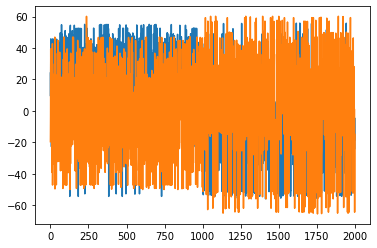

In [23]:
#apply T-sne on the sample of data to check sequence data
#plot data in 2D after using tsne
data_tsne=TSNE(n_components=2,random_state=0)
data__tsne=data_tsne.fit_transform(data_sample)
plt.plot(data__tsne)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

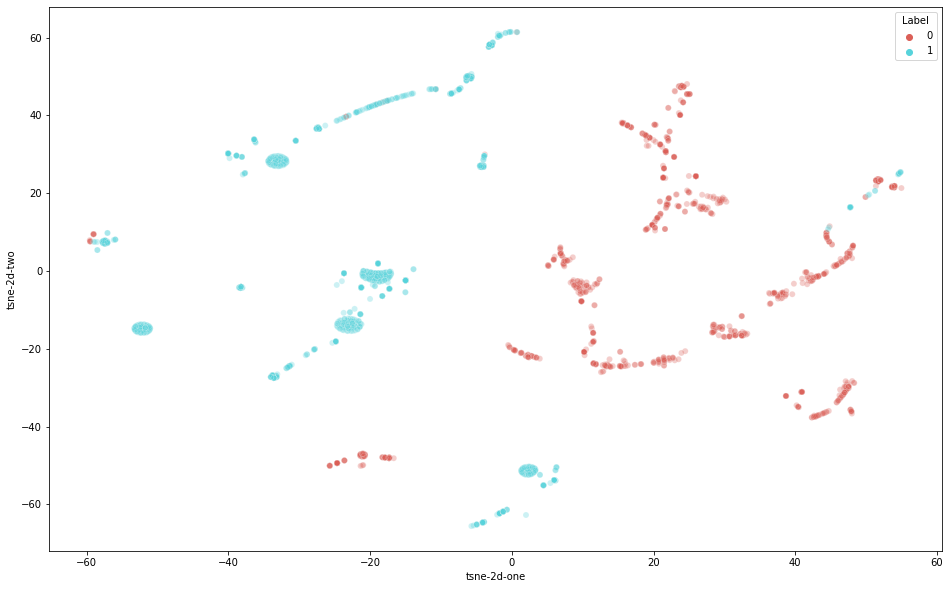

In [24]:
#apply T-sne on the sample of data with labels to check sperate data
#plot data with label in 2D after using tsne
data_tsne=TSNE(n_components=2, random_state=0).fit_transform(data_sample.iloc[:,0:-1])
train_ts=pd.DataFrame(data_sample.iloc[:,-1])
train_ts['tsne-2d-one'] = data_tsne[:,0]
train_ts['tsne-2d-two'] = data_tsne[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Label",
    palette=sns.color_palette("hls", 2),
    data=train_ts,
    legend="full",
    alpha=0.3
)